<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Multiple Linear Regression**
---

## **Linear regression**

* Linear regression is a fundamental statistical and machine learning technique used to model the relationship between a dependent variable (target) and one or more independent variables (features).
* Multiple Linear Regression is an extension of simple linear regression. While simple linear regression uses one independent variable to predict a dependent variable, multiple linear regression uses two or more independent variables.

### **Multiple Linear Regression Formula**

The general form of a multiple linear regression model is:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_nx_n + \varepsilon
$$

Where:
- y = Dependent (response) variable  
- x1, x2, ..., xn = Independent (predictor) variables  
- β0​ = intercept
- β1, β2, ..., βn = Coefficients for each predictor  
- ε = Error term


## **Assumptions**
We can use multiple linear regression for variety case, however there are some assumptions for the model to work properly that consist of:

1. Linearity
2. Independence of errors
3. Homoscedasticity (constant variance)
4. No multicollinearity (Independent variables should not be too correlated)
5. Normality of residuals

## **Study case**

Now, we will build multiple regression model to predict the distance of kilometre by using available features that consist of fuel and other supportive features.

### **Data understanding**

In [1]:
# Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # Remove warning
warnings.filterwarnings('ignore')

# Use 'whitegrid' style available in seaborn
plt.style.use('ggplot') # Set style

In [2]:
# Loading dataset
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/bensin2.csv'
df = pd.read_csv(url)
df.head()

,Liter,Penumpang,Bagasi,Kecepatan,RPM,Suhu,Kilometer
0,20,1,0,42,3000,29,142
1,25,2,15,50,4000,36,177
2,20,4,10,50,3000,24,144
3,30,5,25,50,3000,18,203
4,40,1,40,50,3200,30,273


In [3]:
# Data dimension
df.shape

(65, 7)

In [4]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Liter      65 non-null     int64 
 1   Penumpang  65 non-null     int64 
 2   Bagasi     65 non-null     int64 
 3   Kecepatan  65 non-null     int64 
 4   RPM        65 non-null     object
 5   Suhu       65 non-null     int64 
 6   Kilometer  65 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.7+ KB


### **Data preparation**

I notice that the RPM column has wrong type of data. We will examining it and perform correction.

In [5]:
# Renaming columns
df.rename(columns={
    'Liter': 'Fuel_Liters',
    'Penumpang': 'Passengers',
    'Bagasi': 'Luggage',
    'Kecepatan': 'Velocity',
    'RPM': 'RPM',
    'Suhu': 'Temperature',
    'Kilometer': 'Kilometers'
}, inplace=True)

df.head()

,Fuel_Liters,Passengers,Luggage,Velocity,RPM,Temperature,Kilometers
0,20,1,0,42,3000,29,142
1,25,2,15,50,4000,36,177
2,20,4,10,50,3000,24,144
3,30,5,25,50,3000,18,203
4,40,1,40,50,3200,30,273


In [6]:
# Displaying the error cell in the RPM column
# Coerce invalid parsing to NaN, then filter rows with NaN
invalid_rpm = df[pd.to_numeric(df['RPM'], errors='coerce').isna()]
print(invalid_rpm)


    Fuel_Liters  Passengers  Luggage  Velocity    RPM  Temperature  Kilometers
56           31           1        0        50  2500\           30         221


In [7]:
# Correcting the RPM column
# Remove any non-digit characters using regex and convert to numeric
df['RPM'] = df['RPM'].astype(str).str.extract('(\d+)')  # Keep only numeric part
df['RPM'] = pd.to_numeric(df['RPM'], errors='coerce')   # Convert to integer, invalids become NaN

# Now you can impute missing RPM (NaN) with 2500
df['RPM'].fillna(2500, inplace=True)


In [8]:
# Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Fuel_Liters  65 non-null     int64
 1   Passengers   65 non-null     int64
 2   Luggage      65 non-null     int64
 3   Velocity     65 non-null     int64
 4   RPM          65 non-null     int64
 5   Temperature  65 non-null     int64
 6   Kilometers   65 non-null     int64
dtypes: int64(7)
memory usage: 3.7 KB


Now all data type are integer. The right format for machine learning.

In [9]:
# Missing values
df.isnull().sum().to_frame('Missing Values')

,Missing Values
Fuel_Liters,0
Passengers,0
Luggage,0
Velocity,0
RPM,0
Temperature,0
Kilometers,0


In [10]:
# Duplicates
print('Total number of duplicated data:',df.duplicated().sum())

Total number of duplicated data: 0


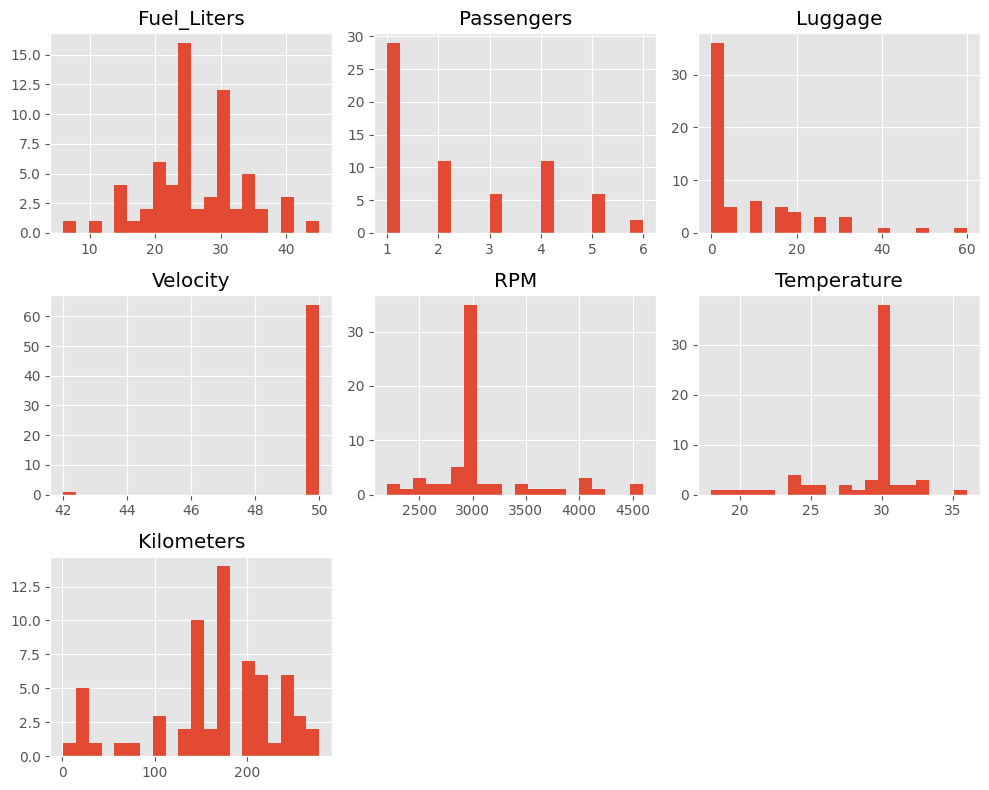

In [11]:
# Data distribution
df.hist(figsize=(10,8), bins=20)
plt.tight_layout()
plt.show()

In [12]:
# Normal test
# Checking normality
numerical = [var for var in df.columns if df[var].dtypes in ['float', 'int64']]

from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(df[feature_name].dropna())

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df


,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,Fuel_Liters,0.892367,6.400662e-01,Normally Distributed
1,Passengers,9.437787,8.925047e-03,Not Normally Distributed
2,Luggage,34.972141,2.546221e-08,Not Normally Distributed
3,Velocity,142.630095,1.067255e-31,Not Normally Distributed
4,RPM,21.775692,1.868395e-05,Not Normally Distributed
5,Temperature,22.294097,1.441778e-05,Not Normally Distributed
6,Kilometers,7.012124,3.001489e-02,Not Normally Distributed


Based on the data distribution and statistical test, we can see that most of our features do not have normal distribution.

We will use 'spearman correlation' instead of 'pearson correlation' to know the relationship among features.

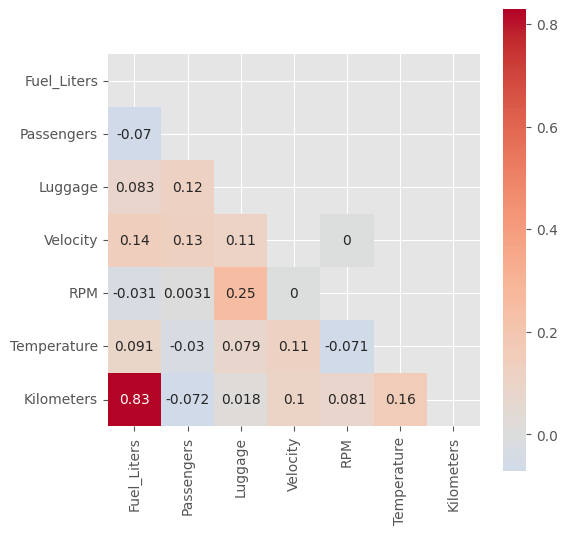

In [13]:
# Correlation between features
# Select numerical columns
numerical = df.select_dtypes(include=np.number)

# Correlation between features
plt.figure(figsize=(6, 6))

matrix = np.triu(numerical.corr(method='spearman'))

sns.heatmap(data=numerical.corr(method='spearman'), annot=True, cmap='coolwarm', mask=matrix, center=0, square=True)
plt.show()

Based on the heatmap correlation graph, We can point out there are positive strong correlation between 'Kilometers' and 'Fuel_Liters'. While, the rest of features have weak correlation.

### **Modeling**

Now, we will define the target and the feature. Our target will be 'Kilometers' or how far the distance that we can go, while the remaining will be the features that can support prediction.

In [14]:
# Defining features and target for modeling
X = df.drop(columns=['Kilometers'])
y = df['Kilometers']

In [15]:
# Data splitting

# Library for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

We will conduct model training using linear regression

In [16]:
# Model Training

# Library
from sklearn.linear_model import LinearRegression

# Define model
model = LinearRegression()

# Fiting
model.fit(X_train, y_train)

LinearRegression()

### **Model evaluation**

After training, we will measure and evaluate the model using some metrics that consist of,

* R-Squared or coefficient determination
* Mean absolute error (MAE)
* Root Mean Squared Error (RMSE)

In [17]:
# Determing R-Squared (Coefficient determination), Mean absolute error (MAE), Root Mean Squared Error (RMSE)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print all metrics
print("Training Results:")
print("R²:", r2_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)

print("\nTesting Results:")
print("R²:", r2_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)


Training Results:
R²: 0.5065632361743486
MAE: 30.517140449783316
RMSE: 48.8874460480104

Testing Results:
R²: 0.7512791584654666
MAE: 24.359068451788477
RMSE: 26.220703980403517


**Result**

| Metric     | Training Set       | Testing Set        |
|------------|--------------------|--------------------|
| R²         | 0.507              | **0.751**        |
| MAE        | 30.52              | **24.36**        |
| RMSE       | 48.89              | **26.22**        |

Based on the result abobe, we can point out some insights:

* The model performs better on test data than on training data, which may indicate  well-generalizing model (All metrics on test set are better than the training set) and the test data might be cleaner or better distributed than training data.
* On unseen data, the model explains 75% of the variance in the target variable, which is a good. The selected features are quite predictive of the target. While, the might come from unexplained features.
* MAE of 24.36 km is the mean average prediction error.


In [18]:
# Intercept and slope
print('intercept : ', model.intercept_)
print('slope : ', model.coef_)

intercept :  11.648224692775159
slope :  [ 6.66334288  3.69110841 -0.53946644 -3.02596391  0.01978747  2.10765162]


So our model, mathematical equation will be:

In [19]:
print(f'y = {model.coef_[0]:.2f}x1 + {model.coef_[1]:.2f}x2 + {model.coef_[2]:.2f}x3 + {model.coef_[3]:.2f}x4 + {model.coef_[4]:.2f}x5 + {model.coef_[5]:.2f}x6 + {model.intercept_:.2f}')

y = 6.66x1 + 3.69x2 + -0.54x3 + -3.03x4 + 0.02x5 + 2.11x6 + 11.65


Now, we want to check with a new number. For example, we have 30 litre of fuel, 2 passengers, 30oC temperature, and velocity of 50 km/h. So, these four predictors will be checked with predict() function to find how much km we can go.

In [23]:
# Predict
data1 = np.array([30, 2, 2, 50, 2500, 30]).reshape(1, -1) # Reshape data1 to a 2D array with one row
result = model.predict(data1)
print(result)

[179.25181194]


The result of the prediction is 179.25 km.

**Good Job!**